## Business Problem
Company A Inc wants to conduct labour planning based on the number of sales they will generate in the future. Therefore, the sales department's objective is to predict future daily sales based on historical data while taking into account seasonality effects, demand, holidays, promotions, and competition.  

## Data Understanding
As a data scientist, I was provided two csv files (train.csv which captures all sales data) and (store.csv which captures store information data). 
So, let's do some data exploration to understand them a bit more!

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#### <font color='red'> Sales Data Exploration </font>

In [2]:
# Import sales data
sales_train_df = pd.read_csv('train.csv')
print('Looking at the top rows of the dataset...')
sales_train_df.head()

Looking at the top rows of the dataset...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
# Let's look at the data types of each column in the dataset!
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


##### <font color='blue'> So our dataset has 9 columns in total with 8 features. Each feature contains 1017209 data points. Sales column is our target variable. </font>

In [4]:
# Now, let's look at some statistical measures of the whole dataset!
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


<h5> 
    <font color='blue'>
- Average sales amount per day is 5773 USD.
- minium sales per day is 0 USD; 
- maximum daily sales is 41551 USD; 
- average number of daily customers is 633; 
- minimum number of customers per day is 0; and 
- maximum number of daily customers is 7388. 
</font> 
</h5>

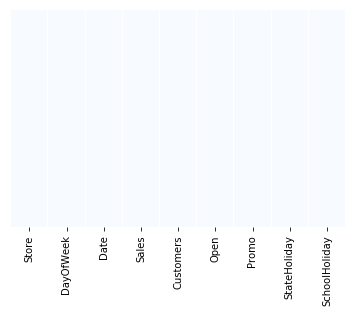

In [5]:
# Let's check to see if we have any missing data
sns.heatmap(sales_train_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

##### <font color='blue'> There is no missing data! </font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa030df9278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa030bde710>]], dtype=object)

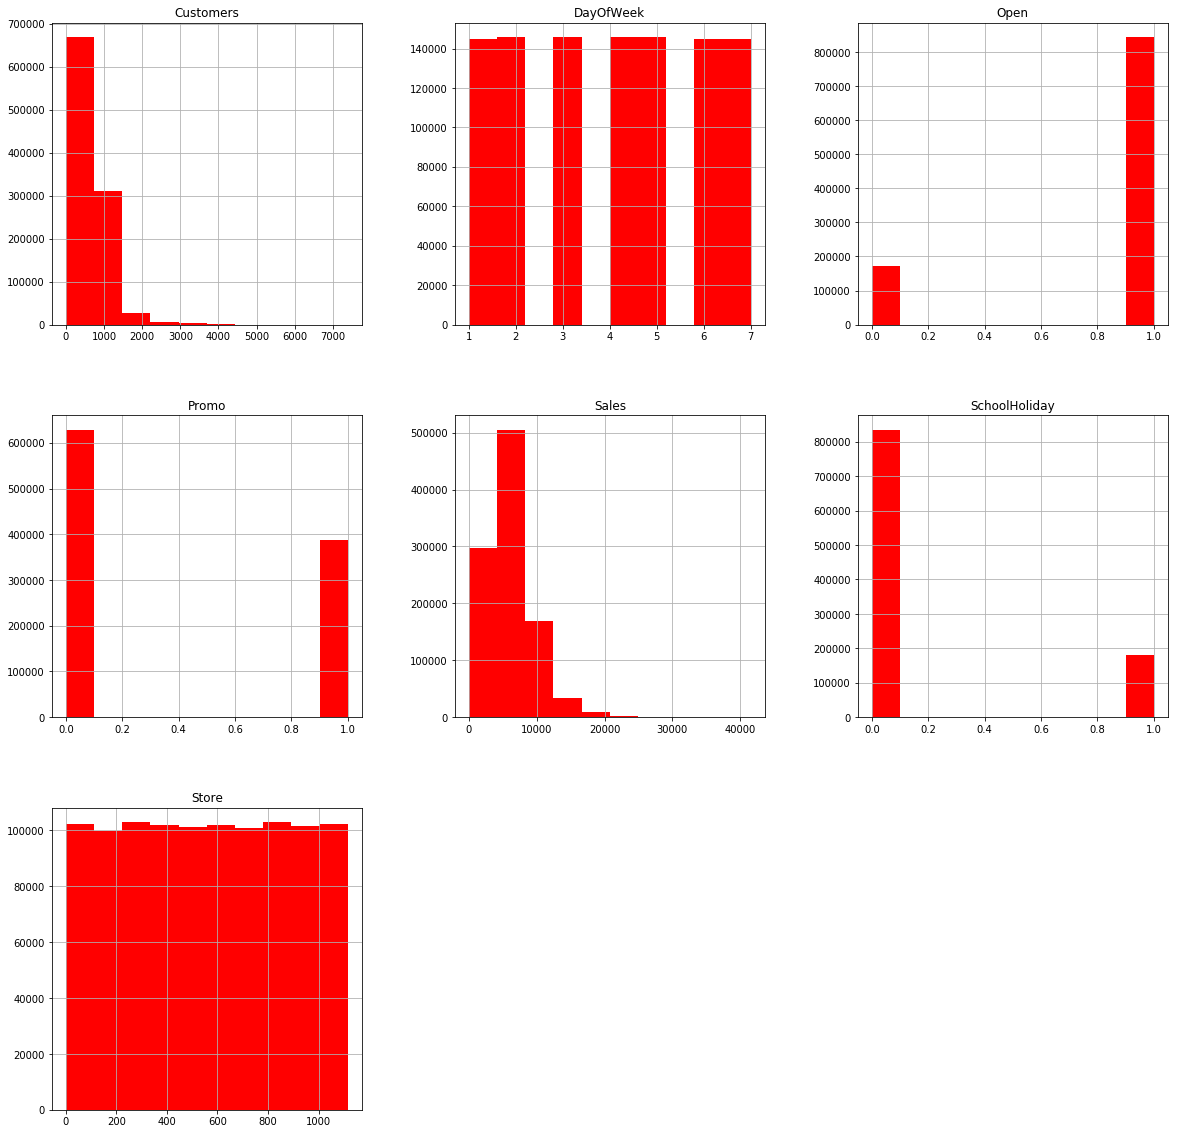

In [6]:
# Let's plot a histgram to see how features and taget values are distributed
sales_train_df.hist(figsize = (20,20), color = 'r')

<h5> <font color='blue'>

- Most days, we have about 500 - 1000 daily customers.
- Data is equally distributed among all stores and days of the week (no bias).
- Most days, we make between 5000 - 6000 USD in sales.
- We have promotion about 40% of the time.
- Our stores are open about 80% of the time.
- School holidays are around 18% of the time.
</font>
    </h5>

In [7]:
# Let's see how many stores are open and closed since we don't really concern about the sales of the store when it is closed
closed_train_df        = sales_train_df[sales_train_df['Open'] == 0]
open_train_df          = sales_train_df[sales_train_df['Open'] == 1]
print("Total =", len(sales_train_df))
print("Number of closed stores =", len(closed_train_df))
print("Number of open stores =", len(open_train_df))

Total = 1017209
Number of closed stores = 172817
Number of open stores = 844392


In [8]:
# let's filter out the dataframe to only open stores and drop the Open column to make sure the dataset is not skewed.
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]
sales_train_df.drop(['Open'], axis=1, inplace=True)

In [9]:
# Let's see if any statistical measure has changed since we dropped the records from closed stores
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


##### <font color='blue'> Both average daily sales and customers jump to 6955 millions USD and 762 respectively. </font>

#### <font color='red'> Store Information Exploration </font>

In [10]:
# Import store information data
store_info_df = pd.read_csv('store.csv')
print('Looking at the top rows of the dataset...')
store_info_df.head()

Looking at the top rows of the dataset...


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
# Let's look at the data types of each column in the dataset!
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


##### <font color='blue'> This dataset includes information about the unique 1115 stores that are a part of this study. </font>

In [12]:
# Now, let's look at some statistical measures of the whole dataset!
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


##### <font color='blue'> In average, the competitor's distance is 5404 meters away (5.4 kms). </font>

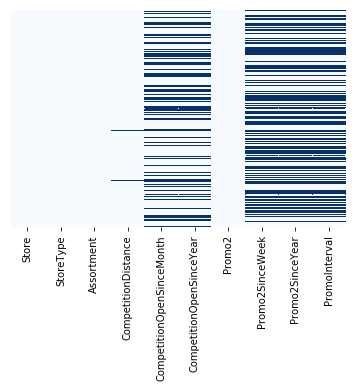

In [13]:
# Let's check to see if we have any misisng data in store information
sns.heatmap(store_info_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

##### <font color='blue'> So, we have missing values in CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, and PromoInterval. </font>

In [14]:
# Let's take a look at the missing values in the 'CompetitionDistance'
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


##### <font color='blue'> Only 3 rows are missing in CompetitionDistance column. </font>

In [15]:
# Let's take a look at the missing values in the 'CompetitionOpenSinceMonth'
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
25,26,d,a,2300.0,NaN,NaN,0,NaN,NaN,NaN
28,29,d,c,2170.0,NaN,NaN,0,NaN,NaN,NaN
31,32,a,a,2910.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
39,40,a,a,180.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
40,41,d,c,1180.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"


##### <font color='blue'> 354 rows are missing in the CompetitionOpenSinceMonth column. </font>

In [16]:
# There may be a corelation among Promo2, promo2SinceWeek, Promo2SinceYear, PromoInternal, so let's have a look!
store_info_df[ store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
22,23,d,a,4060.0,8.0,2005.0,0,NaN,NaN,NaN


##### <font color='blue'> It seems like if 'Promo2' is zero, 'Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero. </font>

In [17]:
# After talking with the business leaders, how long has the competitor been in the current location doesn't really impact our stores' revenues, 
# so let's set all misisng values from Promo2SinceWeek, Promo2SinceYear, PromoInterval, CompetitionOpenSinceYear, and CompetitionOpenSinceMonth to 0.
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

for str in str_cols:
    store_info_df [str].fillna(0, inplace = True)

In [18]:
# There are 3 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa030995518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa02e0ec630>]], dtype=object)

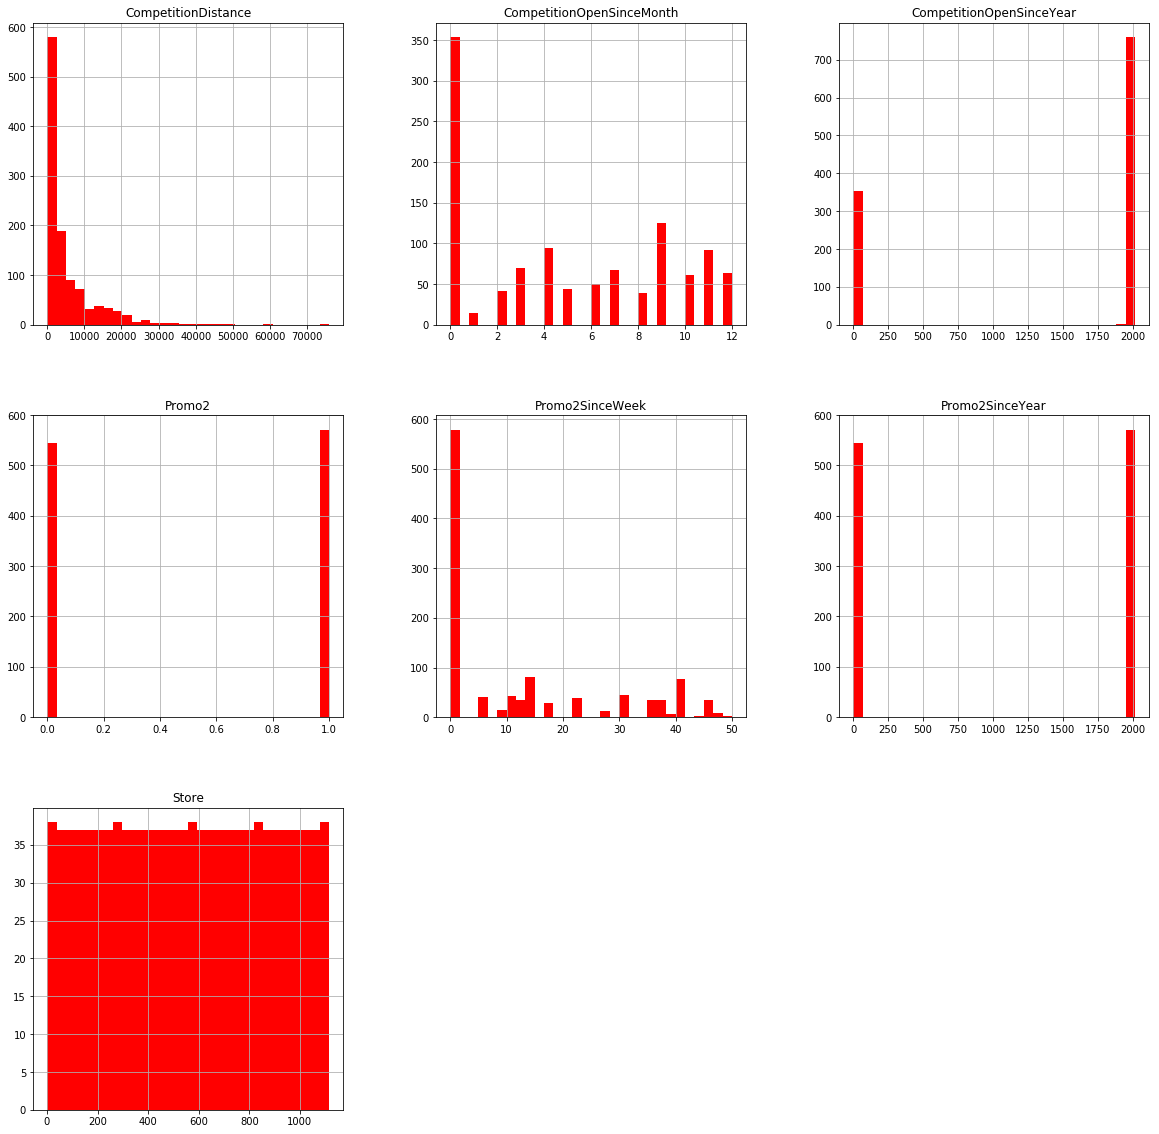

In [19]:
# Now, let's check how the data is distributed
store_info_df.hist(bins = 30, figsize = (20,20), color = 'r')


<h5> <font color='blue'>

- Half of stores are involved in promo 2.
- Half of the stores have their competition at a distance of 0-3000m (3 kms away).
</font>
    </h5>

## Data Understanding
Now, let's prepare the data before modelling by merging two cleaned datasets together!

In [20]:
# Let's merge both data frames together based on 'store'
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store') 

In [21]:
# Export the combined dataframe to a csv file so we can refer to when needed.
sales_train_all_df.to_csv('test.csv', index=False)

In [22]:
# Let's have a look at the whole dataset in general.
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
5,1,6,2015-07-25,4364,500,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
6,1,5,2015-07-24,3706,459,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
7,1,4,2015-07-23,3769,503,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
8,1,3,2015-07-22,3464,463,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
9,1,2,2015-07-21,3558,469,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [23]:
# Let's understand how the features correlate with the revenue
correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

<h5> <font color='blue'>

- Customers and promo are positively correlated with the sales .
- Promo2 does not seem to be effective.
</font>
    </h5>

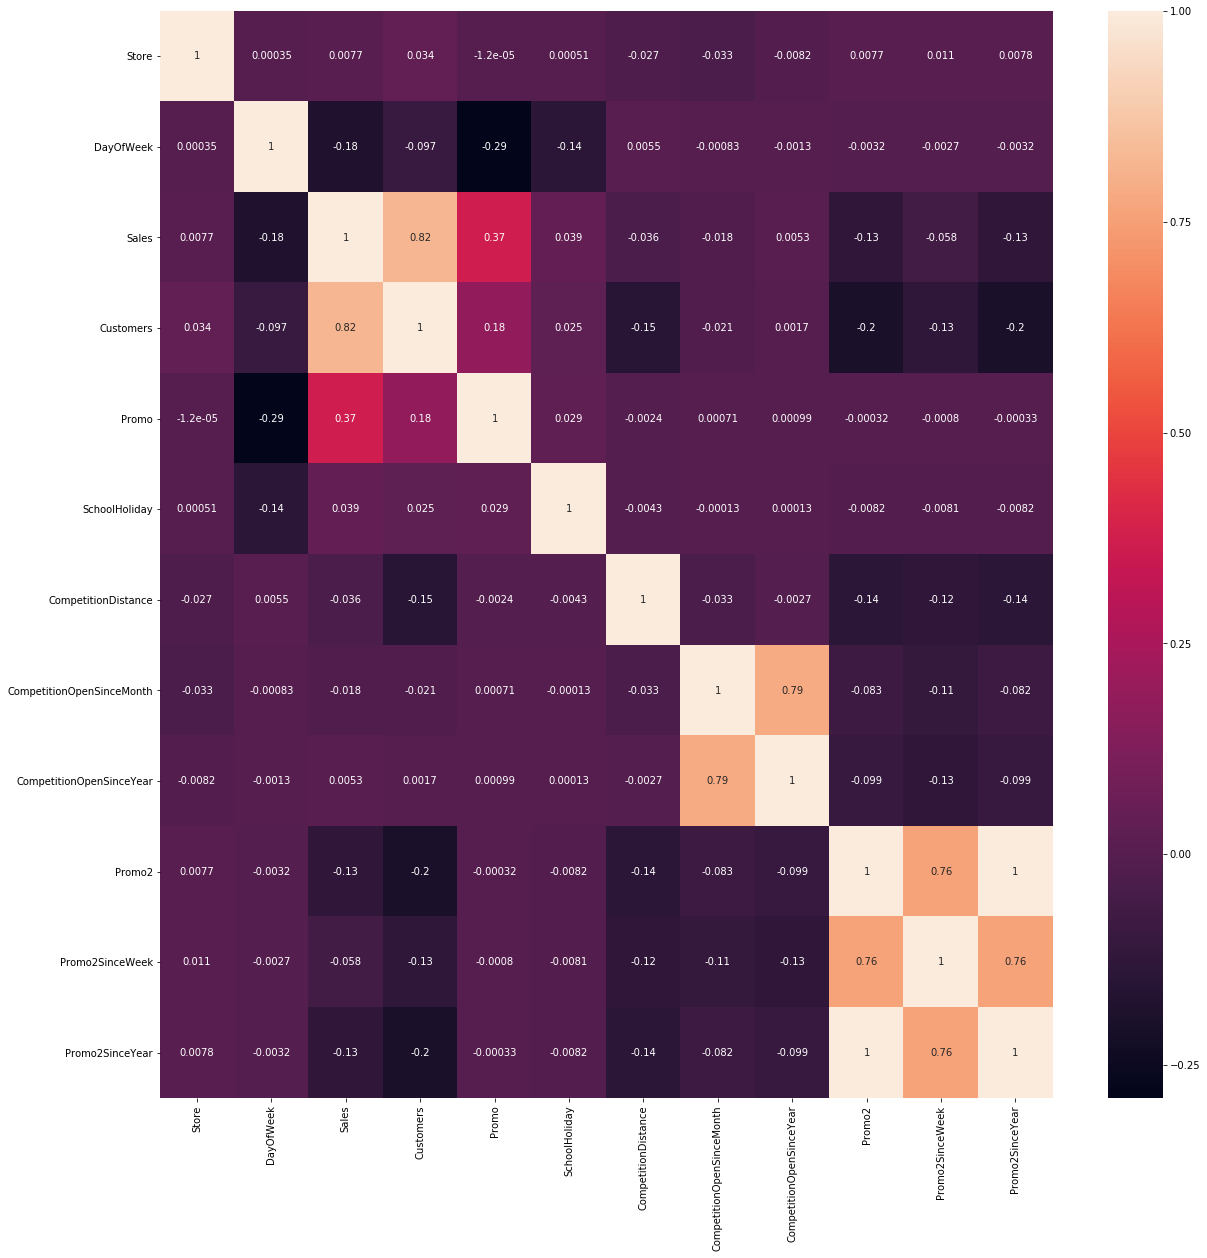

In [24]:
# Let's visualize the correlation in a heatmap
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [25]:
# Let's separate the year, the month, and the day and put them into separate columns. 
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [26]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27
5,1,6,2015-07-25,4364,500,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,25
6,1,5,2015-07-24,3706,459,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,24
7,1,4,2015-07-23,3769,503,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,23
8,1,3,2015-07-22,3464,463,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,22
9,1,2,2015-07-21,3558,469,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,21


Text(0.5,1,'Average Customers Per Month')

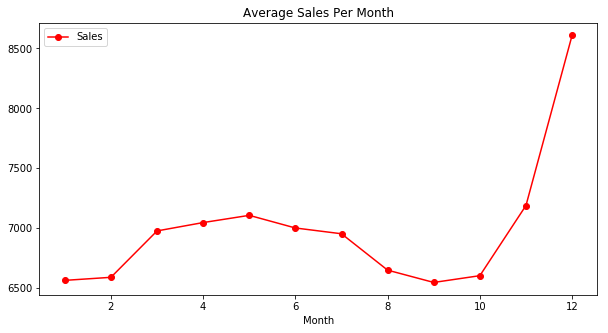

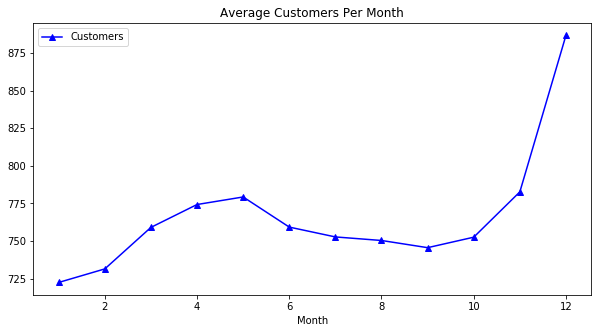

In [27]:
# Let's take a look at the average sales and number of customers per month 
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')

plt.figure()
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Customers Per Month')

##### <font color='blue'> It seems like sales and number of customers peak around Christmas timeframe. </font>

Text(0.5,1,'Average Sales Per Day')

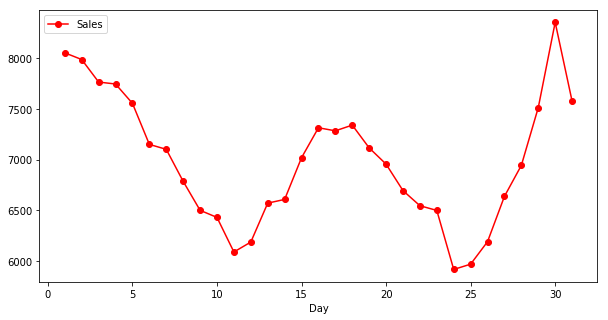

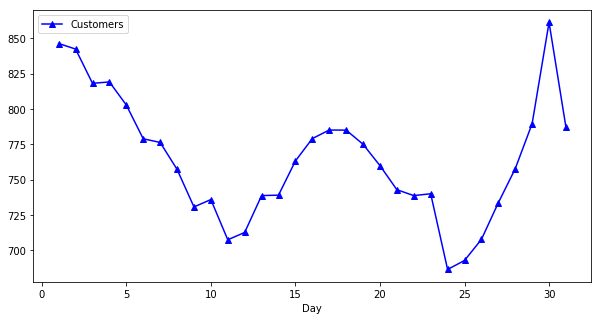

In [28]:
# Let's take a look at the sales and customers per day of the month
ax = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day')

plt.figure()
ax = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Sales Per Day')

<h5> <font color='blue'>

- Most customers and sales are around 30th and 1st of the month.
- We generally don't have a lot of customers and sales around the 24th of the month.
</font>
    </h5>

Text(0.5,1,'Average Customers Per Day of the Week')

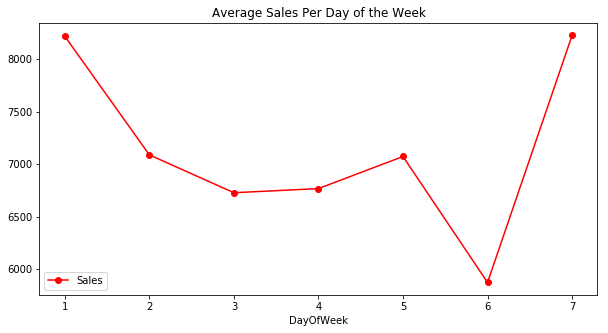

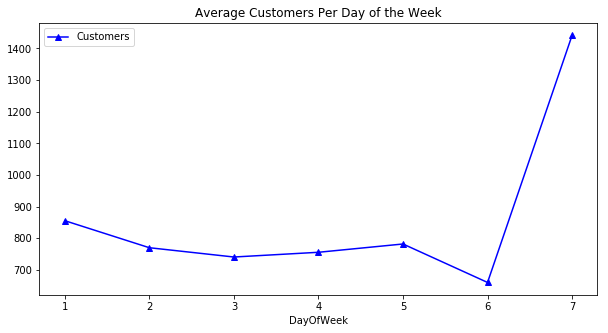

In [29]:
# Let's do the same for the day of the week  (note that 7 = Sunday)

axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day of the Week')

plt.figure()
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Customers Per Day of the Week')

<h5> <font color='blue'>

- Most customers and sales happen around the weekend.
- We generally don't have a lot of customers and sales on weekdays.
</font>
    </h5>

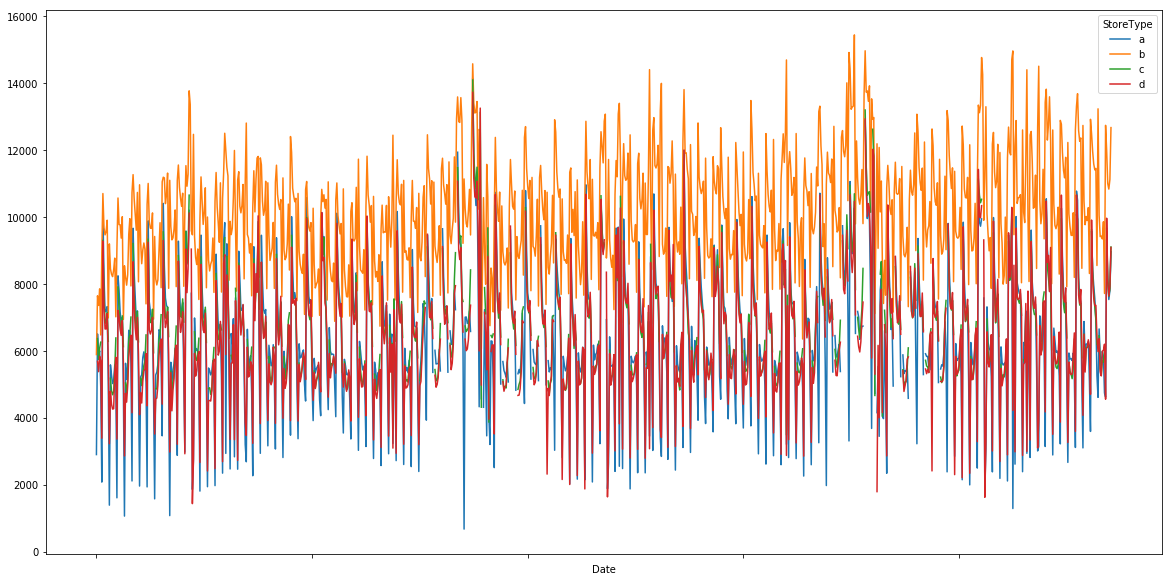

In [30]:
# Let's measure the effectiveness of different store types.
fig, ax = plt.subplots(figsize=(20,10))
sales_train_all_df.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax=ax)

<h5> <font color='blue'>

- Most sales come from store type b.
- Store type a and d don't generate as much sales as b and c.
</font>
    </h5>

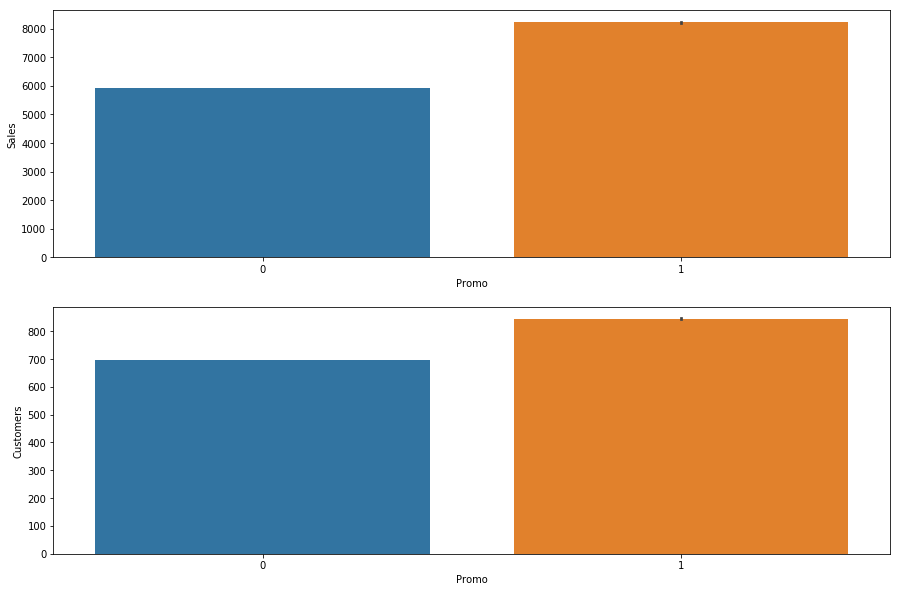

In [31]:
# We know that promo2 is not effective in driving more sales, let's examine the effectiveness of promo then!
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df)

##### <font color='blue'> Promo seems to be very effective at driving more sales and attract more customers. </font>

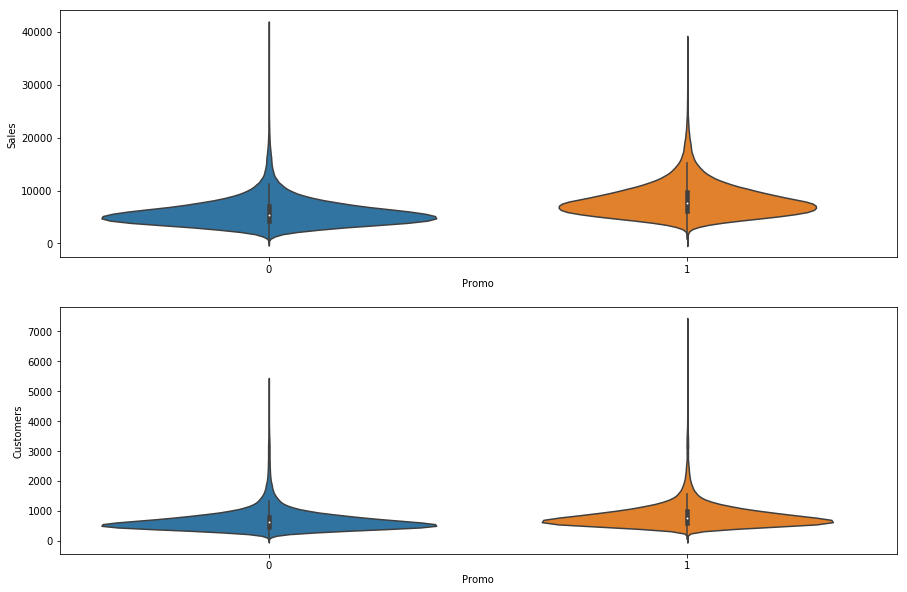

In [32]:
# Let's use violin plot to visualize the distribution of the promo on sales and more customers.
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)

plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data = sales_train_all_df)

<h5> <font color='blue'>

- Promo really drives the sales up most of the days; however, does not seem to impact the maximum sales we could get to.
- However, promo does help attract the highest number of customers we can reach while does not seem to change the overall trends in the number of customers coming to the store.
</font>
    </h5>

#### <font color='red'> Filling and turning categorical variables into numbers </font>

In [33]:
# Check for columns which aren't numeric
for label, content in sales_train_all_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Date
StateHoliday
StoreType
Assortment
PromoInterval


In [34]:
# Turn categorical variables into numbers
for label, content in sales_train_all_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        sales_train_all_df[label] = pd.Categorical(content).codes+1

In [35]:
pd.Categorical(sales_train_all_df["StateHoliday"]).codes+1

array([2, 2, 2, ..., 2, 2, 2], dtype=int8)

## Data Modelling
Let's use Random Forest to train our models!

In [36]:
sales_train_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 20 columns):
Store                        844392 non-null int64
DayOfWeek                    844392 non-null int64
Date                         844392 non-null int16
Sales                        844392 non-null int64
Customers                    844392 non-null int64
Promo                        844392 non-null int64
StateHoliday                 844392 non-null int8
SchoolHoliday                844392 non-null int64
StoreType                    844392 non-null int8
Assortment                   844392 non-null int8
CompetitionDistance          844392 non-null float64
CompetitionOpenSinceMonth    844392 non-null float64
CompetitionOpenSinceYear     844392 non-null float64
Promo2                       844392 non-null int64
Promo2SinceWeek              844392 non-null float64
Promo2SinceYear              844392 non-null float64
PromoInterval                844392 non-null int8
Year            

In [37]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,942,5263,555,1,2,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,1,2015,7,31
1,1,4,941,5020,546,1,2,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,1,2015,7,30
2,1,3,940,4782,523,1,2,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,1,2015,7,29
3,1,2,939,5011,560,1,2,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,1,2015,7,28
4,1,1,938,6102,612,1,2,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,1,2015,7,27


In [38]:
len(sales_train_all_df)

844392

In [39]:
sales_train_all_df.describe()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,466.043547,6955.514291,762.728395,0.446352,1.868612,0.193580,2.205413,1.936477,5457.842215,4.926491,1369.688401,0.498684,11.596118,1003.230065,1.976838,2013.831937,5.845738,15.835683
std,321.731914,1.723689,274.491913,3104.214680,401.227674,0.497114,0.343232,0.395103,1.363364,0.993097,7799.322503,4.283663,935.558173,0.499999,15.307873,1005.874806,1.081667,0.777260,3.323931,8.683456
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2013.000000,1.000000,1.000000
25%,280.000000,2.000000,228.000000,4859.000000,519.000000,0.000000,2.000000,0.000000,1.000000,1.000000,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2013.000000,3.000000,8.000000
50%,558.000000,3.000000,455.000000,6369.000000,676.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2330.000000,4.000000,2006.000000,0.000000,0.000000,0.000000,1.000000,2014.000000,6.000000,16.000000
75%,837.000000,5.000000,709.000000,8360.000000,893.000000,1.000000,2.000000,0.000000,4.000000,3.000000,6880.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000,3.000000,2014.000000,8.000000,23.000000
max,1115.000000,7.000000,942.000000,41551.000000,7388.000000,1.000000,5.000000,1.000000,4.000000,3.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,4.000000,2015.000000,12.000000,31.000000


In [40]:
# Since this is a time series dataset, we will split data into train and test data based on years. let's see how many data points per year we have:
sales_train_all_df.Year.value_counts()

2013    337943
2014    310417
2015    196032
Name: Year, dtype: int64

In [41]:
# Because of the volume of data, let's use data in 2015 as testing dataset and the rest are for training dataset.
df_val = sales_train_all_df[sales_train_all_df.Year == 2015]
df_train = sales_train_all_df[sales_train_all_df.Year != 2015]

len(df_val), len(df_train)

(196032, 648360)

In [42]:
# Split data into X & y
X_train, y_train = df_train.drop("Sales", axis=1), df_train.Sales
X_valid, y_valid = df_val.drop("Sales", axis=1), df_val.Sales
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((648360, 19), (648360,), (196032, 19), (196032,))

In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## Evaluate the Results

In [67]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Validation MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Validation RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Validation R^2": model.score(X_valid, y_valid)}
    return scores

In [52]:
# Let's see how the model goes predicting on the test data
test_preds = model.predict(X_valid)

In [58]:
# Create DataFrame compatible for the prediction dataset
df_preds = pd.DataFrame()
df_preds["Store"] = df_val["Store"]
df_preds["Customers"] = df_val["Customers"]
df_preds["Date"] = df_val["Date"]
df_preds["PredictedSales"] = test_preds
df_preds["ActualSales"] = y_valid

In [59]:
df_preds

,Store,Customers,Date,PredictedSales,ActualSales
0,1,555,942,4773.0,5263
1,1,546,941,4787.1,5020
2,1,523,940,4837.9,4782
3,1,560,939,5133.9,5011
4,1,612,938,5552.6,6102
5,1,500,936,4071.6,4364
6,1,459,935,3875.9,3706
7,1,503,934,4039.6,3769
8,1,463,933,3790.1,3464
9,1,469,932,3876.7,3558


In [61]:
# Evaluate the model on the test set
model.score(X_valid, y_valid)

0.96396114948744638

In [68]:
show_scores(model)

{'Training MAE': 134.15228314516625,
 'Validation MAE': 393.64139579252372,
 'Training RMSLE': 0.029284639746288779,
 'Validation RMSLE': 0.074701592778854187,
 'Training R^2': 0.99502218349459315,
 'Validation R^2': 0.96396114948744638}

In [80]:
# Plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns, "feature_importances": importances})
         .sort_values("feature_importances", ascending=True)
         .reset_index(drop=True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()
    plt.savefig("feature_importance.png")

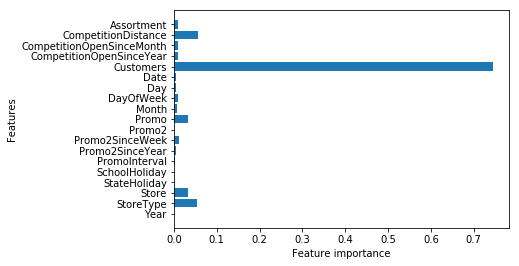

In [79]:
plot_features(X_train.columns, model.feature_importances_)

<h5> <font color='blue'>

- Overall, the model has performed well with an accuracy score of 96.4% and acceptable R square, RMLSE. and MAE.
- The most important features are customers, CompetitionDistance, StoreType, and Store.
</font>
    </h5>